# Data Preparation Process - UNSW-NB15 Dataset

The dataset used in this project are based on the UNSW-NB15 dataset, which is a comprehensive collection of network traffic data designed for persistent threat, threat intelligence and intrusion detection research. 


The dataset contains:-

1. **49 Features**
2. **Class labels** (Identified **9 classes**) 

#### Dataset Files:

1. **UNSW-NB15_{1-4}.csv** - This is the original dataset containing raw network traffic data with features and labels for binary and multi-class classification tasks.

2. **UNSW-NB15_features.csv** - This file provides a detailed description of all 49 features included in the original dataset along with the class label. It serves as a reference for understanding each feature's role in the analysis.

In [1]:
!pip install prettytable
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pickle
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

## Merging and Concatenating Raw Datasets

1. **Load Raw Datsets:** The four raw CSV files (UNSW-NB15_1.csv to UNSW-NB15_4.csv) are read into separate dataframes.

2. **Concatenate Datasets:** All datasets are concatenated into one, creating a single unified dataframe with **2,540,047 rows** and **49 columns**

3. **Saving Merged Data:** The merged dataset is saved as **merged_data.csv**, with a file size of approximately 576 MB.

In [3]:
# dictionary to save parameters for the test data transformation
final_dict = {}

dfs = []
for i in range(1,5):
    path = r'F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\datasets\Raw_FIles\UNSW-NB15_{}.csv'  # 4 input CSV files
    dfs.append(pd.read_csv(path.format(i), header=None))
    
# Concatenate datasets into single dataframe
data = pd.concat(dfs).reset_index(drop=True)

data_col = pd.read_csv(r'F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\datasets\NUSW-NB15_features.csv', encoding='ISO-8859-1')
data_col["Name"] = data_col["Name"].apply(lambda x: x.strip().replace(' ', '').lower())

data.columns = data_col["Name"]

final_dict["columns"] = data_col["Name"][data_col["Name"] != 'label'].tolist()

# cleaning the temporary variables
del data_col

In [4]:
print("Rows and Column Numbers of the Final Dataset (Merged): ", data.shape)
print("Total Numbers of Data in the Final Dataset (Merged): ", data.size)

Rows and Column Numbers of the Final Dataset (Merged):  (2540047, 49)
Total Numbers of Data in the Final Dataset (Merged):  124462303


In [5]:
temp_file_path = r'F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\data_preparation\merged_data.csv'
data.to_csv(temp_file_path, index=False)

###  File Size of the Merged Dataset

In [6]:
def get_file_size(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
    return round(size, 2)

# Get the file size of the merged data
size = get_file_size(temp_file_path)
rows, cols = data.shape

# Output the details
print(f"File: {os.path.basename(temp_file_path)}")
print(f"  - Size: {size} MB")
print(f"  - Rows: {rows}, Columns: {cols}")
print(f"  - Columns and Data Types:\n{data.dtypes}\n")


File: merged_data.csv
  - Size: 576.01 MB
  - Rows: 2540047, Columns: 49
  - Columns and Data Types:
Name
srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
stime                 int64
ltime                 int64
sintpkt             float64
dintpkt             float6

## Train Test Split of the Merged Dataset

In [7]:
train, test = train_test_split(data, test_size=0.3, random_state=16)

print("Null values in train data:")
print(train.isnull().sum())

Null values in train data:
Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat          

<Figure size 1000x600 with 0 Axes>

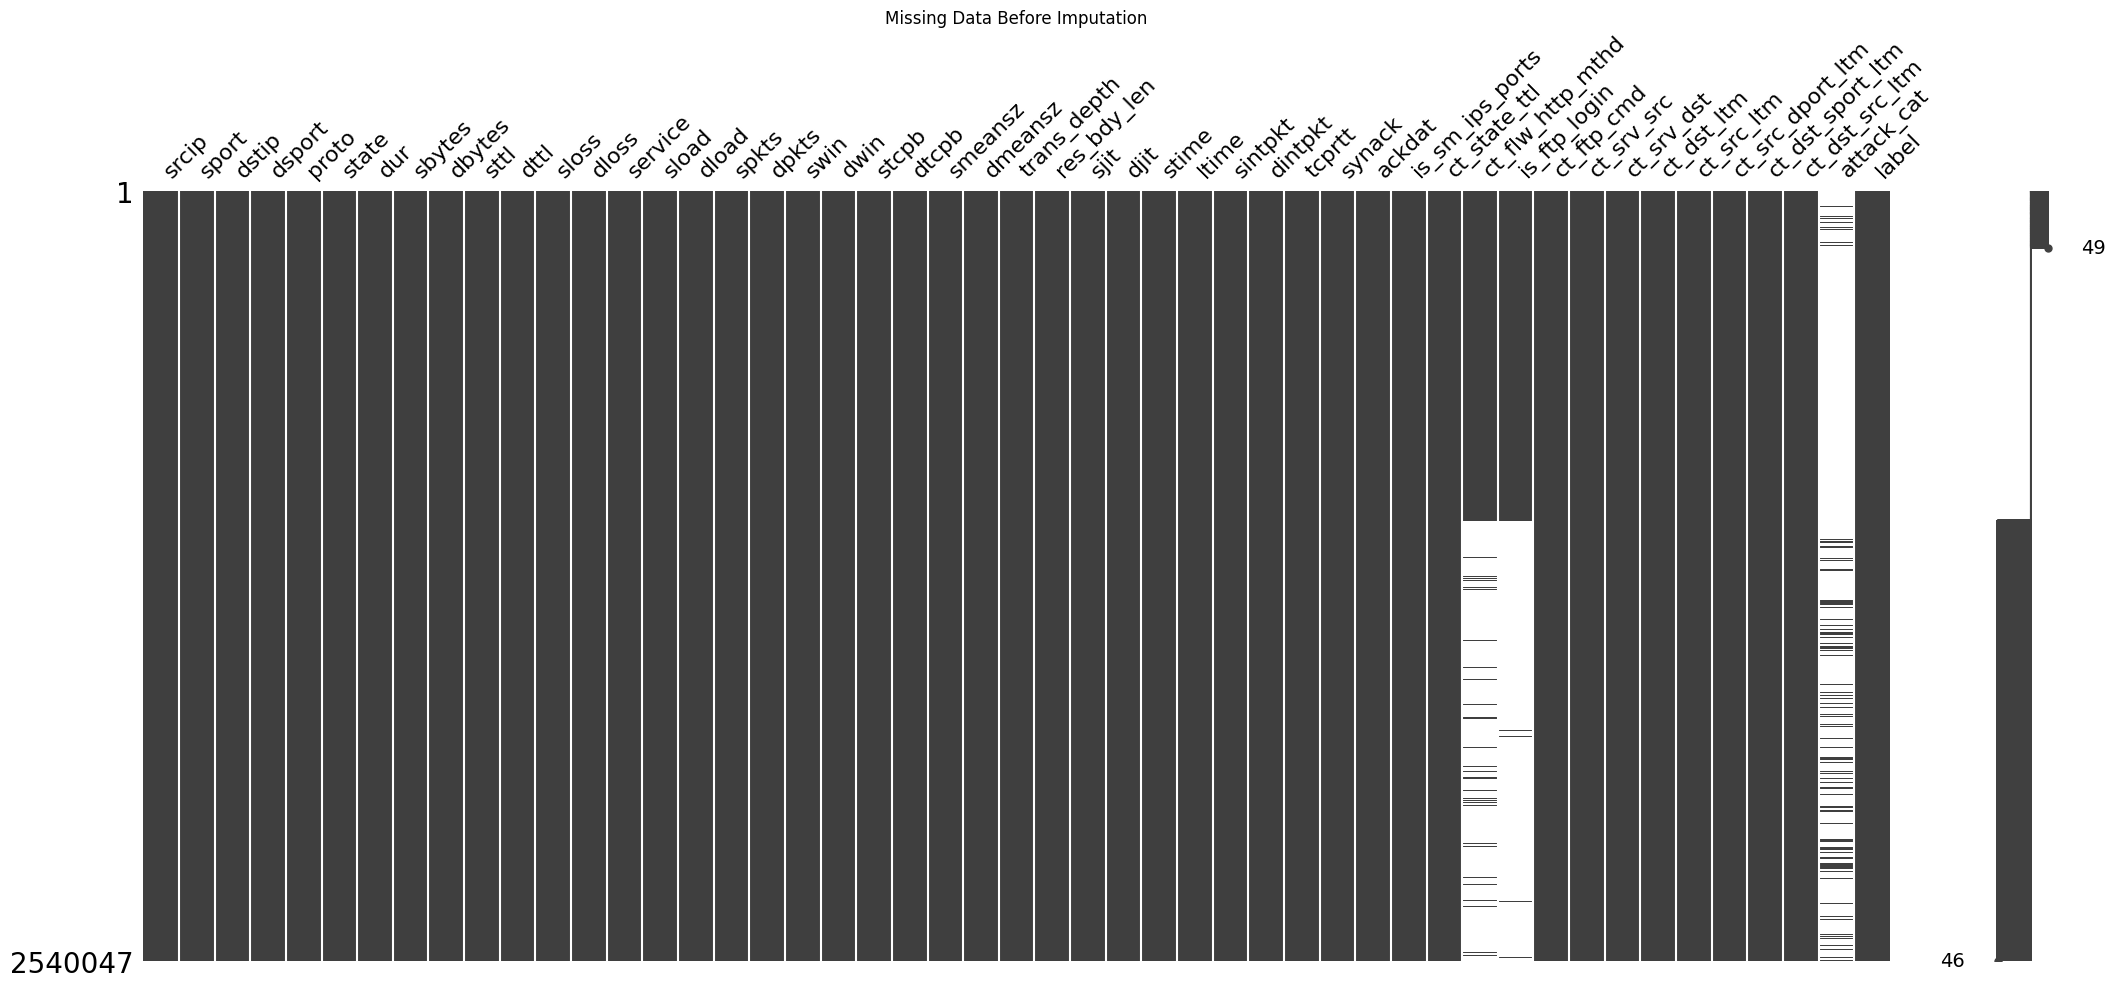

In [8]:
from missingno import matrix

plt.figure(figsize=(10,6))
matrix(data)
plt.title("Missing Data Before Imputation")
plt.show()

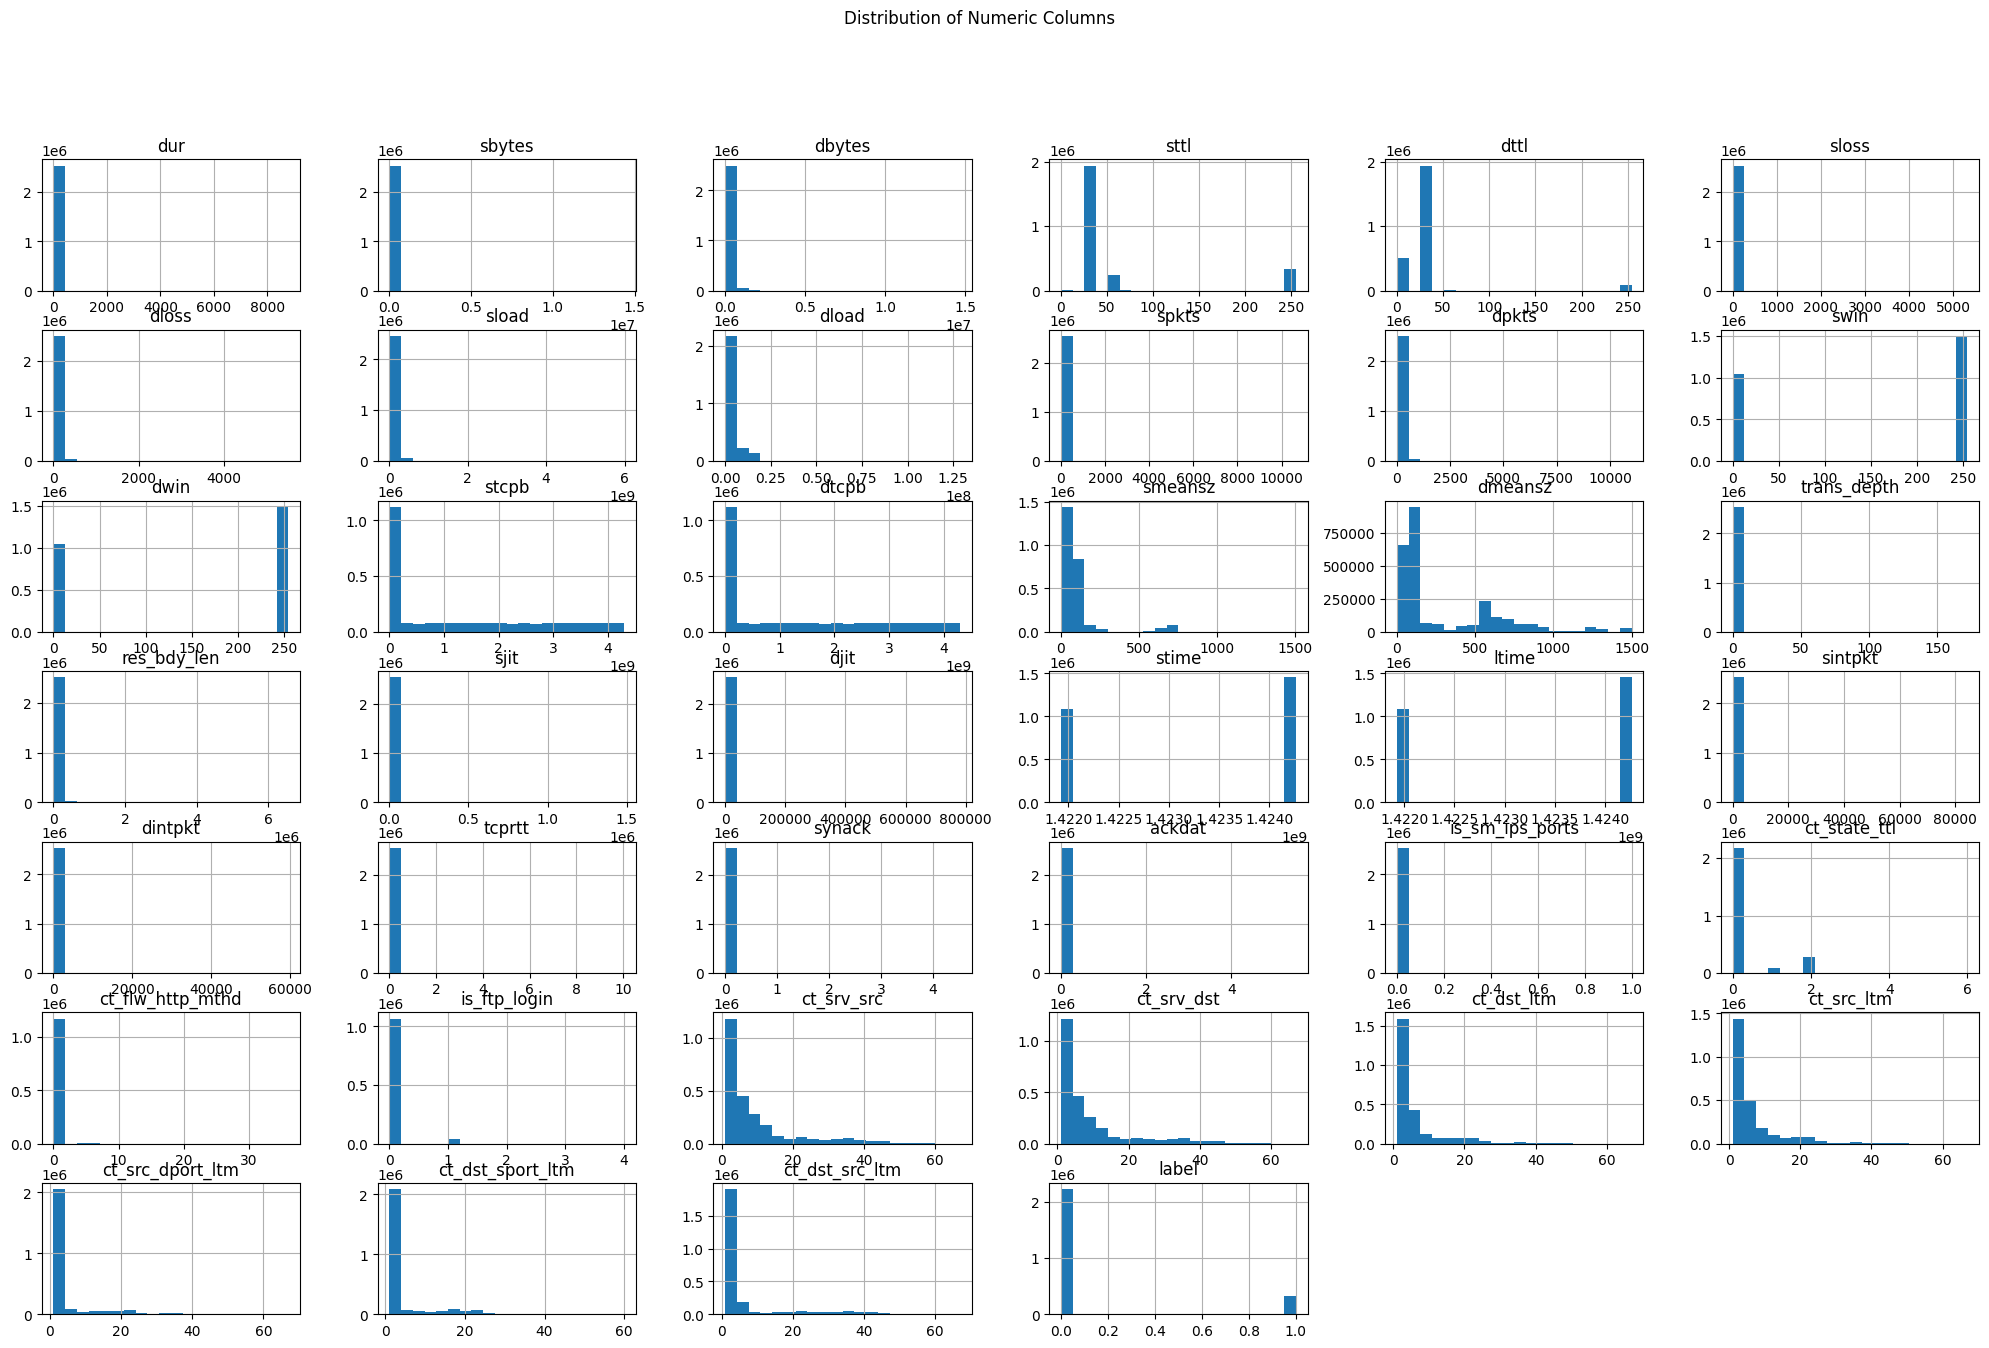

In [9]:
# Plot histograms for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns].hist(bins=20, figsize=(25, 15))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

## Imputing or Filling Null Values

**Imputation strategies:**

- Replace missing values in attack_cat with **'normal'**.
- Fill missing numeric values (**ct_flw_http_mthd** and **is_ftp_login**) with 0.
- **Post-imputation**, the dataset is verified to have no missing values.

In [10]:
# Defining preprocessing pipeline and specific columns
pipeline = Pipeline([
    ('impute_attack_cat', SimpleImputer(strategy='constant', fill_value='normal')),
    ('impute_ct_flw_http_mthd', SimpleImputer(strategy='constant', fill_value=0)),
    ('impute_is_ftp_login', SimpleImputer(strategy='constant', fill_value=0))
])

train['attack_cat'] = pipeline.named_steps['impute_attack_cat'].fit_transform(train[['attack_cat']]).flatten()
train['attack_cat'] = train['attack_cat'].apply(lambda x: x.strip().lower())

train['ct_flw_http_mthd'] = pipeline.named_steps['impute_ct_flw_http_mthd'].fit_transform(train[['ct_flw_http_mthd']]).flatten()
train['is_ftp_login'] = pipeline.named_steps['impute_is_ftp_login'].fit_transform(train[['is_ftp_login']]).astype(int).flatten()



In [11]:
# Final check for null values
print("Null values in train data:", train.isnull().sum().sum())
print("Train Data Preview:")
print(train.head())

print("Test Data Preview:")
print(test.head())

Null values in train data: 0
Train Data Preview:
Name              srcip  sport           dstip dsport proto state       dur  \
81030      175.45.176.0   5060  149.171.126.18   4569   udp   INT  0.100437   
1969394  149.171.126.15   1043    175.45.176.3     53   udp   INT  0.000008   
541834       59.166.0.8  15265   149.171.126.8  13292   tcp   FIN  0.014842   
1070955      59.166.0.1   4951   149.171.126.9     21   tcp   FIN  0.807553   
863423       59.166.0.9  11505   149.171.126.3   6881   tcp   FIN  0.018598   

Name     sbytes  dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
81030       178       0   254  ...           0           2           2   
1969394     264       0    60  ...                      20          20   
541834     2542   23122    31  ...           0          18           6   
1070955    2934    3740    31  ...           1           1           2   
863423     1540    1644    31  ...           0           8           8   

Name    ct_dst_ltm  ct_src_ltm 

In [12]:
train

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
81030,175.45.176.0,5060,149.171.126.18,4569,udp,INT,0.100437,178,0,254,...,0,2,2,1,1,1,1,1,normal,0
1969394,149.171.126.15,1043,175.45.176.3,53,udp,INT,0.000008,264,0,60,...,,20,20,16,16,16,8,20,normal,0
541834,59.166.0.8,15265,149.171.126.8,13292,tcp,FIN,0.014842,2542,23122,31,...,0,18,6,3,4,1,1,1,normal,0
1070955,59.166.0.1,4951,149.171.126.9,21,tcp,FIN,0.807553,2934,3740,31,...,1,1,2,5,2,1,1,2,normal,0
863423,59.166.0.9,11505,149.171.126.3,6881,tcp,FIN,0.018598,1540,1644,31,...,0,8,8,10,10,6,1,7,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620383,59.166.0.4,42780,149.171.126.6,111,udp,CON,0.004606,568,312,31,...,,6,6,5,6,1,1,4,normal,0
2244989,59.166.0.3,2609,149.171.126.8,111,udp,CON,0.397336,568,320,31,...,,3,2,1,2,1,1,1,normal,0
98939,59.166.0.8,32959,149.171.126.6,53,udp,CON,0.001047,130,162,31,...,0,1,1,1,1,1,1,1,normal,0
98885,59.166.0.1,42869,149.171.126.4,5642,tcp,FIN,0.004920,3800,2456,31,...,0,7,8,4,3,1,1,3,normal,0


In [13]:
train.dtypes.value_counts()

int64      28
float64    11
object      9
int32       1
dtype: int64

In [14]:
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [15]:
print(train['ct_ftp_cmd'].unique())
train['ct_ftp_cmd'] = train['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

[0 ' ' 1 '1' '0' 5 2 3 4 '4' 6 '2' 8]


In [16]:
train['ct_ftp_cmd'].unique()

array([0, 1, 5, 2, 3, 4, 6, 8])

In [17]:
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [18]:
saved_dict = {}

saved_dict['binary_col'] = ['is_sm_ips_ports', 'is_ftp_login']

In [19]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(train[col].value_counts())
    print()

0    1775116
1       2916
Name: is_sm_ips_ports, dtype: int64

0    1747573
1      30329
4        109
2         21
Name: is_ftp_login, dtype: int64



In [20]:
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])
train['is_ftp_login'].value_counts()

0    1747573
1      30459
Name: is_ftp_login, dtype: int64

In [21]:
train['service'] = train['service'].apply(lambda x: "None" if x=='-' else x)
train['service'].value_counts()

None        872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: service, dtype: int64

In [22]:
train['attack_cat'] = train['attack_cat'].replace('backdoors', 'backdoor', regex=True).apply(lambda x: x.strip().lower())

In [23]:
print(train.shape, test.shape)

(1778032, 49) (762015, 49)


In [24]:
folder_path = r'F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\data_preparation'

os.makedirs(folder_path, exist_ok=True)
    
train.to_csv(os.path.join(folder_path, "Training_Dataset.csv"), index=False)
test.to_csv(os.path.join(folder_path, "Testing_Dataset.csv"), index=False)
    
print(f"Training dataset saved to: {os.path.join(folder_path, 'Training_Dataset.csv')}")
print(f"Testing dataset saved to: {os.path.join(folder_path, 'Testing_Dataset.csv')}")

Training dataset saved to: F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\data_preparation\Training_Dataset.csv
Testing dataset saved to: F:\Advanced _Threat_Detection\UNSW-NB15\CSV_Files\data_preparation\Testing_Dataset.csv
